In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - delete time parameter study - 40,60,80 Nodes

In [761]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\data_10\\data_spd_2_n_40_del_100_pdf.csv')

In [762]:
df.head()

,run,numNodes,spdDelTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-53-20211207-14:27...,40,100,3,TARPNetwork.node[17].app[0],NaN,NaN,513.0,513000.0,513.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-B-56-20211207-14:28...,40,100,6,TARPNetwork.node[22].app[0],631.0,631000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomWaypointMobility-SPD-B-53-20211207-14:27...,40,100,3,TARPNetwork.node[22].app[0],697.0,697000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomWaypointMobility-SPD-B-58-20211207-14:28...,40,100,8,TARPNetwork.node[17].app[0],NaN,NaN,620.0,620000.0,620.0,900.0,900.0,900000.0
4,RandomWaypointMobility-SPD-B-54-20211207-14:27...,40,100,4,TARPNetwork.node[17].app[0],NaN,NaN,309.0,309000.0,309.0,900.0,900.0,900000.0


In [763]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [764]:
df = df.sort_values(by=['repetition'])

In [765]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [766]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [767]:
print (results)   

[0.6632, 0.7111, 0.7438, 0.7577, 0.5736, 0.5238, 0.7139, 0.688, 0.8348, 0.679]


In [768]:
print (results_x) 

[0.6067, 0.75, 0.6956, 0.7744, 0.54, 0.5656, 0.7011, 0.6133, 0.8833, 0.6822]


In [769]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 68.89


In [770]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 68.12


In [781]:
df_spd_2_80 = pd.DataFrame({'spdDelTime':[50, 60, 70, 80, 90, 100],
                       'PDF':[96.93, 95.16, 96.77, 91.4, 94.9, 91.0]})

df_spd_2_80_errors = [1.95, 3.42, 2.2, 5.2, 2.07, 6.05]

df_spd_2_60 = pd.DataFrame({'spdDelTime':[50, 60, 70, 80, 90, 100],
                       'PDF':[93.5, 91.69, 91.54, 90.33, 89.07, 85.59]})

df_spd_2_60_errors = [3.32, 4.05, 4.12, 3.81, 3.08 , 6.5]

df_spd_2_40 = pd.DataFrame({'spdDelTime':[50, 60, 70, 80, 90, 100],
                       'PDF':[75.62, 78.82, 73.81, 74.27, 70.46, 68.12]})

df_spd_2_40_errors = [6.35, 6.79, 3.23, 6.02, 7.7, 6.15]


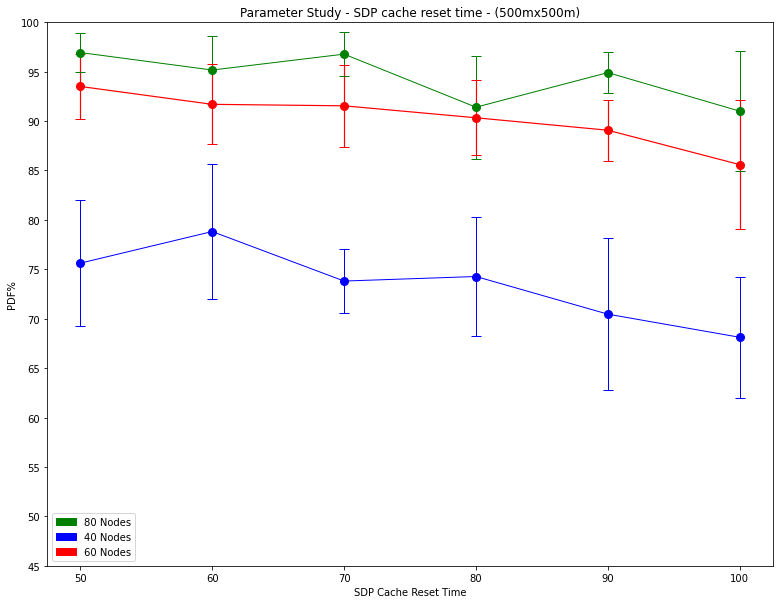

In [782]:


plt.xlabel("SDP Cache Reset Time")
plt.ylabel("PDF%")
plt.title("Parameter Study - SDP cache reset time - (500mx500m)")

plt.xticks(np.arange(50,101, 10))
plt.yticks(np.arange(45,101, 5))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([45, 100])

plt.errorbar(
  x=df_spd_2_80.spdDelTime, 
  y=df_spd_2_80.PDF, 
  yerr=df_spd_2_80_errors, 
  capsize=5,
  marker='o', 
  color='green', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_40.spdDelTime, 
  y=df_spd_2_40.PDF, 
  yerr=df_spd_2_40_errors, 
  capsize=5,
  marker='o', 
  color='blue', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_60.spdDelTime, 
  y=df_spd_2_60.PDF, 
  yerr=df_spd_2_60_errors, 
  capsize=5,
  marker='o', 
  color='red', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

# red_patch = mpatches.Patch(color='red', label='60 Nodes')
# green_patch = mpatches.Patch(color='green', label='80 Nodes')
# blue_patch = mpatches.Patch(color='blue', label='40 Nodes')

plt.legend(handles=[ green_patch, blue_patch, red_patch])



fig = plt.gcf()
fig.set_size_inches(13, 10)

plt.savefig('simulation-pdf-deltime-parameter study.png', dpi=300)